In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x
import pandas as pd
import tensorflow as tf 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('fivethirtyeight')
import numpy as n
from PIL import Image
from tensorflow import data 

import os
import numpy as np
import pathlib
import random
from datascience import *


print(tf.__version__)


/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


2.2.0


In [ ]:
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# 
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1IdNeYOHputshR8AImklK0sVpYq8fTsGP'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("open3feetbig.csv")

file_id = '1ctGq5K29SN40eErcf41s_kgsIR2RES7F'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("open9feetbig.csv")

file_id = '1c-70tU3y-woB61BqEmw6pM6cpVnEZoYR'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("wall3feetbig.csv")

file_id = '1yFC9ZIo-XQ2UzeTKeL6hZJXYKof5k40u'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("wall9feetbig.csv")

In [ ]:
open3feet = pd.read_csv("open3feetbig.csv")
open9feet = pd.read_csv("open9feetbig.csv")
wall3feet = pd.read_csv("wall3feetbig.csv")
wall9feet = pd.read_csv("wall9feetbig.csv")
rssi_data = pd.DataFrame(data = {"open3feet" : open3feet["RSSI"],
                                 "open9feet" : open9feet["RSSI"],
                                 "wall3feet" : wall3feet["RSSI"],
                                 "wall9feet" : wall9feet["RSSI"]})
rssi_data

,open3feet,open9feet,wall3feet,wall9feet
0,-58,-65.0,-65.0,-74.0
1,-59,-65.0,-66.0,-73.0
2,-58,-66.0,-65.0,-74.0
3,-57,-65.0,-68.0,-73.0
4,-58,-59.0,-63.0,-80.0
...,...,...,...,...
636,-65,NaN,NaN,NaN
637,-64,NaN,NaN,NaN
638,-65,NaN,NaN,NaN
639,-65,NaN,NaN,NaN


In [ ]:
rssi_data500 = rssi_data.iloc[:500]
rssi_data500

,open3feet,open9feet,wall3feet,wall9feet
0,-58,-65.0,-65.0,-74.0
1,-59,-65.0,-66.0,-73.0
2,-58,-66.0,-65.0,-74.0
3,-57,-65.0,-68.0,-73.0
4,-58,-59.0,-63.0,-80.0
...,...,...,...,...
495,-65,-59.0,-63.0,-72.0
496,-58,-65.0,-64.0,-74.0
497,-58,-65.0,-67.0,-74.0
498,-56,-65.0,-64.0,-75.0


In [ ]:
bins = np.arange(-80,-50,0.35)

In [ ]:
rssi_data500[['open3feet']].hist(bins=bins)
rssi_data500[['open9feet']].hist(bins=bins)
rssi_data500[['wall3feet']].hist(bins=bins)
rssi_data500[['wall9feet']].hist(bins=bins)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0357f2eb38>]],
      dtype=object)

In [ ]:
#start here
#bootstrapping all datas for more variability hoping to find distinguishments
open3 = []
open9 = []
wall3 = []
wall9 = []

for i in range(100):
  bootstrapsample = rssi_data500[['open3feet']].sample(n=500, replace=True)['open3feet']
  open3.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['open9feet']].sample(n=500, replace=True)['open9feet']
  open9.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['wall3feet']].sample(n=500, replace=True)['wall3feet']
  wall3.extend(bootstrapsample)

  bootstrapsample = rssi_data500[['wall9feet']].sample(n=500, replace=True)['wall9feet']
  wall9.extend(bootstrapsample)


  



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc15f88eeb8>]],
      dtype=object)

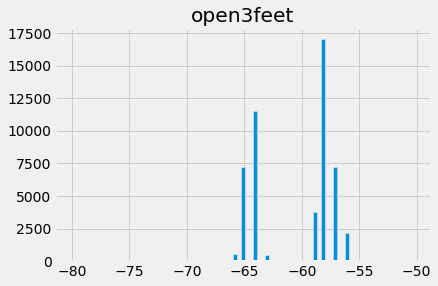

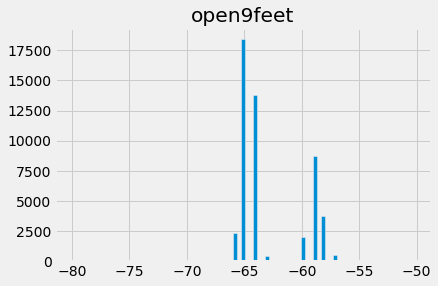

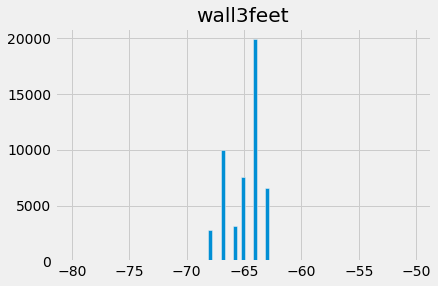

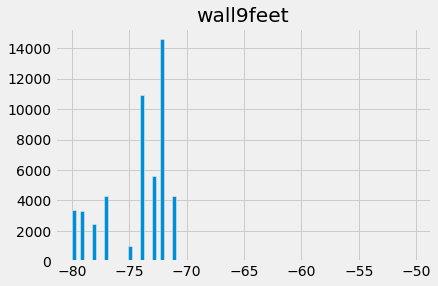

In [ ]:
bootstrapdata = pd.DataFrame({"open3feet": open3,"open9feet":open9, "wall3feet": wall3, "wall9feet":wall9})
bootstrapdata[['open3feet']].hist(bins=bins)
bootstrapdata[['open9feet']].hist(bins=bins)
bootstrapdata[['wall3feet']].hist(bins=bins)
bootstrapdata[['wall9feet']].hist(bins=bins)

In [ ]:
bootstrapdata

,open3feet,open9feet,wall3feet,wall9feet
0,-65,-64.0,-68.0,-72.0
1,-57,-64.0,-64.0,-71.0
2,-65,-65.0,-64.0,-74.0
3,-65,-66.0,-64.0,-72.0
4,-58,-59.0,-66.0,-80.0
...,...,...,...,...
49995,-65,-60.0,-65.0,-79.0
49996,-59,-66.0,-63.0,-79.0
49997,-64,-60.0,-64.0,-78.0
49998,-58,-64.0,-64.0,-78.0


In [ ]:
n_data = 50000
#takes pd series and return the combined series
#below6feet is class 1, above 6 feet is class 0 


below6 = bootstrapdata["open3feet"].values.tolist()
below6labels = [1] * n_data

above6 = []
extend9 = bootstrapdata["open9feet"].values.tolist()
extendwall3 = bootstrapdata["wall3feet"].values.tolist()
extendwall9 = bootstrapdata["wall9feet"].values.tolist()
above6.extend(extend9)
above6.extend(extendwall3)
above6.extend(extendwall9)
above6labels = [0] * n_data * 3




print(below6)
print(below6labels)
print(above6)
print(above6labels)

[-58, -57, -64, -58, -65, -65, -56, -66, -57, -57, -59, -57, -64, -58, -57, -57, -57, -58, -57, -64, -64, -59, -58, -64, -65, -57, -59, -58, -58, -58, -57, -64, -58, -57, -59, -56, -57, -57, -58, -58, -64, -64, -64, -64, -64, -64, -58, -58, -58, -59, -58, -59, -65, -64, -57, -64, -58, -57, -57, -57, -56, -58, -64, -58, -65, -64, -59, -65, -56, -57, -64, -58, -57, -59, -58, -65, -64, -64, -56, -64, -58, -56, -64, -58, -59, -59, -64, -57, -64, -58, -64, -64, -64, -58, -58, -58, -64, -58, -64, -65, -58, -58, -58, -58, -57, -57, -57, -58, -58, -58, -58, -58, -65, -58, -65, -57, -65, -56, -64, -57, -58, -57, -58, -58, -64, -56, -58, -57, -58, -65, -65, -64, -64, -64, -58, -57, -58, -58, -57, -64, -65, -57, -58, -65, -64, -56, -58, -57, -58, -65, -57, -58, -64, -65, -59, -64, -63, -59, -65, -59, -64, -59, -64, -58, -65, -59, -64, -58, -64, -58, -58, -63, -57, -64, -65, -63, -58, -66, -58, -57, -58, -65, -57, -65, -64, -64, -64, -57, -64, -64, -58, -58, -58, -64, -58, -63, -58, -59, -64, -64,

In [ ]:
##verifying lengths
print(len(below6))
print(len(above6))

50000
150000


In [ ]:
##combining data and shuffling

data = []
data.extend(below6)
data.extend(above6)

datalabels = []
datalabels.extend(below6labels)
datalabels.extend(above6labels)

df = pd.DataFrame({'RSSI': data,
                          "target":datalabels})

shuffleddf = df.sample(frac=1)



In [ ]:
## splitting data
train, test = train_test_split(shuffleddf, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

128000 train examples
32000 validation examples
40000 test examples


In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
feature_columns = []

# numeric cols
for header in ['RSSI']:
  feature_columns.append(feature_column.numeric_column(header))

In [ ]:

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
#batching data to put into the feature layer with type and feature name to put data into keras model
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)
## sequential model using tensorflow and keras, feed forward, fully connected neural network

In [ ]:
#model structure
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(64, activation='relu'),
  layers.Dropout(.25),
  layers.Dense(1)
])

In [ ]:
## training the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=30)

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

4000/4000 [==============================] - 9s 2ms/step - loss: 0.5270 - accuracy: 0.7492 - val_loss: 0.4117 - val_accuracy: 0.7528
Epoch 2/30
4000/4000 [==============================] - 9s 2ms/step - loss: 0.4114 - accuracy: 0.8066 - val_loss: 0.3928 - val_accuracy: 0.8348
Epoch 3/30
4000/4000 [==============================] - 9s 2ms/step - loss: 0.4006 - accuracy: 0.8205 - val_loss: 0.3842 - val_accuracy: 0.8348
Epoch 4/30
4000/4000 [==============================] - 8s 2ms/step - loss: 

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.526973,0.749250,0.411691,0.752844,0
1,0.411375,0.806625,0.392782,0.834781,1
2,0.400565,0.820469,0.384198,0.834781,2
3,0.398661,0.820531,0.373923,0.863031,3
4,0.397236,0.823000,0.387479,0.797750,4


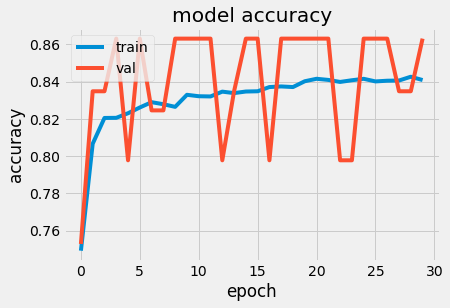

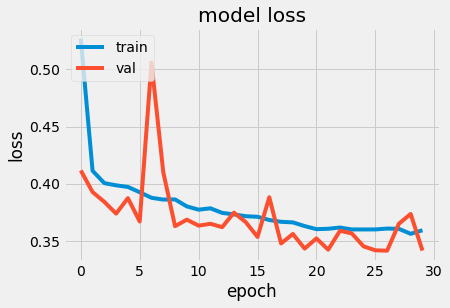

In [ ]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# final test accuracy
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

1250/1250 [==============================] - 1s 1ms/step - loss: 0.3457 - accuracy: 0.8596
Accuracy 0.859624981880188


In [ ]:
#testing individual data points
df = pd.DataFrame(data={
  "RSSI": np.array([-55, -65, -70]),
  "target": np.array([1, 0, 0])
})
ds = df_to_dataset(df)
model.predict_classes(ds)